In [19]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
from sklearn import preprocessing
import pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import pickle
%matplotlib inline

## Preprocessing

##### 1. Loading data:

The stroke statistics are stored in quadruples for each stroke, paired with the predeterined horizontal value. 

In [20]:
stat = pickle.load(open('/media/patrik/1EDB65B8599DD93E/PycharmProjects/stat', 'rb'))
pd_stat_per_file = [pd.DataFrame(np.array(file), columns=['Degree', 'H_Dist', 'D_Dist', 'Length', 'Horizontal']) 
                 for file in stat]

np_stat_per_file = np.array([np.array(file) for file in stat])

summerized_stat = []

for file in stat:
    for stroke in file:
        summerized_stat.append(stroke)

# All of the stroke parameter vectors are stored in this variable.
np_stat = np.array(summerized_stat)

data_length = len(np_stat)

for data_frame in pd_stat_per_file:
    print(data_frame.head())

      Degree      H_Dist      D_Dist    Length  Horizontal
0  70.204014  124.916667    6.925876  0.508186         0.0
1  34.067554  122.906250  136.099238  1.802150         0.0
2  72.038094  227.611111   92.824134  2.147402         0.0
3  78.323396  145.500000    4.872088  0.613679         0.0
4  37.804315   45.500000   18.753902  0.506339         1.0
    Degree   H_Dist   D_Dist    Length Horizontal
0  106.197  382.821  15.3378  0.979135          0
1  64.8474  292.844  129.261   1.77307          0
2   51.413  184.567  116.328   2.26148          0
3  23.7136  5.70833  3.97414   0.61202          1
4  95.6023  354.583  4.32749  0.854233          0
       Degree    H_Dist     D_Dist    Length  Horizontal
0   76.028415  193.1875  14.142646  0.564846         0.0
1   10.142556   17.2500   5.880144  0.289417         1.0
2   77.450204  201.5625  34.418326  0.982743         0.0
3  100.146923   61.1500  58.507085  0.557228         0.0
4   41.729833   44.3125  37.873035  0.353547         0.0
    

##### 2. Visualizing data:

Average degree is calculated by taking the avarge of the included angle between every vector defined by each consecutive points and a horizontal line.
The second parameter is the average of the distance of a stroke's points from the horizontal line that goes through that stroke's first point.
The third parameter is similar to the previous one, in that measurement is the average distance from a line, altough it is now a line that is defined by the directional vector from the first to the last point.
Fourth parameter is the stroke's length divided by the average length of the text's strokes.

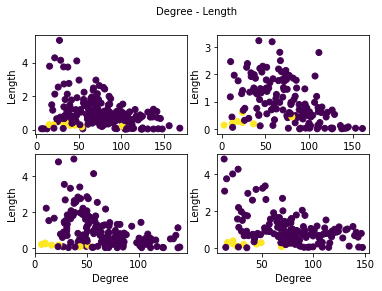

In [21]:
fig = plt.figure()
fig.suptitle('Degree - Length', fontsize=10)
fig.add_subplot(2,2,1)
plt.scatter(np_stat_per_file[0][:,0], np_stat_per_file[0][:,3], c=np_stat_per_file[0][:,4])
plt.xlabel('Degree', fontsize=10)
plt.ylabel('Length', fontsize=10)
fig.add_subplot(2,2,2)
plt.scatter(np_stat_per_file[1][:,0], np_stat_per_file[1][:,3], c=np_stat_per_file[1][:,4])
plt.xlabel('Degree', fontsize=10)
plt.ylabel('Length', fontsize=10)
fig.add_subplot(2,2,3)
plt.scatter(np_stat_per_file[2][:,0], np_stat_per_file[2][:,3], c=np_stat_per_file[2][:,4])
plt.xlabel('Degree', fontsize=10)
plt.ylabel('Length', fontsize=10)
fig.add_subplot(2,2,4)
plt.scatter(np_stat_per_file[3][:,0], np_stat_per_file[3][:,3], c=np_stat_per_file[3][:,4])
plt.xlabel('Degree', fontsize=10)
plt.ylabel('Length', fontsize=10)

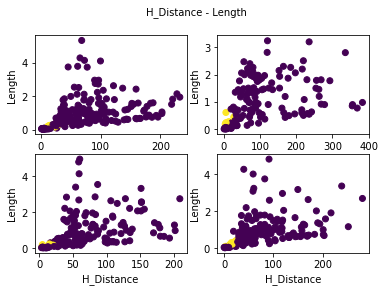

In [22]:
fig = plt.figure()
fig.suptitle('H_Distance - Length', fontsize=10)
fig.add_subplot(2,2,1)
plt.scatter(np_stat_per_file[0][:,1], np_stat_per_file[0][:,3], c=np_stat_per_file[0][:,4])
plt.xlabel('H_Distance', fontsize=10)
plt.ylabel('Length', fontsize=10)
fig.add_subplot(2,2,2)
plt.scatter(np_stat_per_file[1][:,1], np_stat_per_file[1][:,3], c=np_stat_per_file[1][:,4])
plt.xlabel('H_Distance', fontsize=10)
plt.ylabel('Length', fontsize=10)
fig.add_subplot(2,2,3)
plt.scatter(np_stat_per_file[2][:,1], np_stat_per_file[2][:,3], c=np_stat_per_file[2][:,4])
plt.xlabel('H_Distance', fontsize=10)
plt.ylabel('Length', fontsize=10)
fig.add_subplot(2,2,4)
plt.scatter(np_stat_per_file[3][:,1], np_stat_per_file[3][:,3], c=np_stat_per_file[3][:,4])
plt.xlabel('H_Distance', fontsize=10)
plt.ylabel('Length', fontsize=10)

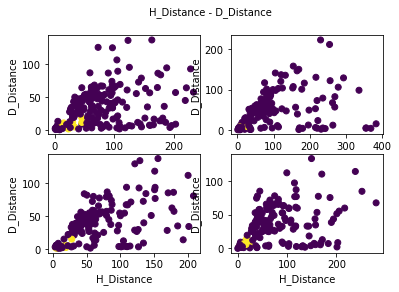

In [23]:
fig = plt.figure()
fig.suptitle('H_Distance - D_Distance', fontsize=10)
fig.add_subplot(2,2,1)
plt.scatter(np_stat_per_file[0][:,1], np_stat_per_file[0][:,2], c=np_stat_per_file[0][:,4])
plt.xlabel('H_Distance', fontsize=10)
plt.ylabel('D_Distance', fontsize=10)
fig.add_subplot(2,2,2)
plt.scatter(np_stat_per_file[1][:,1], np_stat_per_file[1][:,2], c=np_stat_per_file[1][:,4])
plt.xlabel('H_Distance', fontsize=10)
plt.ylabel('D_Distance', fontsize=10)
fig.add_subplot(2,2,3)
plt.scatter(np_stat_per_file[2][:,1], np_stat_per_file[2][:,2], c=np_stat_per_file[2][:,4])
plt.xlabel('H_Distance', fontsize=10)
plt.ylabel('D_Distance', fontsize=10)
fig.add_subplot(2,2,4)
plt.scatter(np_stat_per_file[3][:,1], np_stat_per_file[3][:,2], c=np_stat_per_file[3][:,4])
plt.xlabel('H_Distance', fontsize=10)
plt.ylabel('D_Distance', fontsize=10)

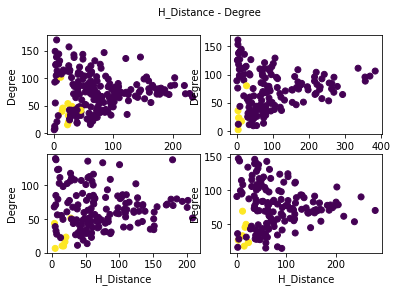

In [24]:
fig = plt.figure()
fig.suptitle('H_Distance - Degree', fontsize=10)
fig.add_subplot(2,2,1)
plt.scatter(np_stat_per_file[0][:,1], np_stat_per_file[0][:,0], c=np_stat_per_file[0][:,4])
plt.xlabel('H_Distance', fontsize=10)
plt.ylabel('Degree', fontsize=10)
fig.add_subplot(2,2,2)
plt.scatter(np_stat_per_file[1][:,1], np_stat_per_file[1][:,0], c=np_stat_per_file[1][:,4])
plt.xlabel('H_Distance', fontsize=10)
plt.ylabel('Degree', fontsize=10)
fig.add_subplot(2,2,3)
plt.scatter(np_stat_per_file[2][:,1], np_stat_per_file[2][:,0], c=np_stat_per_file[2][:,4])
plt.xlabel('H_Distance', fontsize=10)
plt.ylabel('Degree', fontsize=10)
fig.add_subplot(2,2,4)
plt.scatter(np_stat_per_file[3][:,1], np_stat_per_file[3][:,0], c=np_stat_per_file[3][:,4])
plt.xlabel('H_Distance', fontsize=10)
plt.ylabel('Degree', fontsize=10)

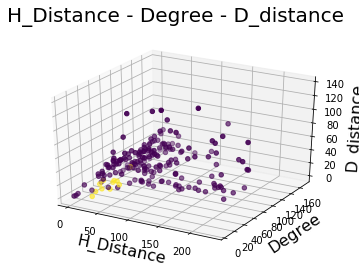

In [25]:
fig = plt.figure()
fig.suptitle('H_Distance - Degree - D_distance', fontsize=20)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np_stat_per_file[0][:,1], np_stat_per_file[0][:,0],
                                              np_stat_per_file[0][:,2], c=np_stat_per_file[0][:,4])
ax.set_xlabel('H_Distance', fontsize=16)
ax.set_ylabel('Degree', fontsize=16)
ax.set_zlabel('D_distance', fontsize=16)

##### 3. Spitting data:

First step is to separate the stroke data vector into 5 columns.

In [26]:
avg_degree = np_stat[:,0]
h_distance = np_stat[:,1]
d_distance = np_stat[:,2]
length = np_stat[:,3]
h_value = np_stat[:,4]

Each column is divided into 3 parts, train, validation and test data.

In [27]:
train_split = 0.7
valid_split = 0.2
test_split = 0.1

train_avg_degree = np.array(avg_degree[:data_length-int(data_length*0.1)-int(data_length*0.2)], dtype='float').reshape(-1, 1)
train_h_distance = np.array(h_distance[:data_length-int(data_length*0.1)-int(data_length*0.2)], dtype='float').reshape(-1, 1)
train_d_distance = np.array(d_distance[:data_length-int(data_length*0.1)-int(data_length*0.2)], dtype='float').reshape(-1, 1)
train_length = np.array(length[:data_length-int(data_length*0.1)-int(data_length*0.2)], dtype='float').reshape(-1, 1)
train_h_value = np.array(h_value[:data_length-int(data_length*0.1)-int(data_length*0.2)], dtype='float').reshape(-1, 1)

valid_avg_degree = np.array(avg_degree[data_length-int(data_length*0.1)-int(data_length*0.2):data_length-int(data_length*0.1)], dtype='float').reshape(-1, 1)
valid_h_distance = np.array(h_distance[data_length-int(data_length*0.1)-int(data_length*0.2):data_length-int(data_length*0.1)], dtype='float').reshape(-1, 1)
valid_d_distance = np.array(d_distance[data_length-int(data_length*0.1)-int(data_length*0.2):data_length-int(data_length*0.1)], dtype='float').reshape(-1, 1)
valid_length = np.array(length[data_length-int(data_length*0.1)-int(data_length*0.2):data_length-int(data_length*0.1)], dtype='float').reshape(-1, 1)
valid_h_value = np.array(h_value[data_length-int(data_length*0.1)-int(data_length*0.2):data_length-int(data_length*0.1)], dtype='float').reshape(-1, 1)

test_avg_degree = np.array(avg_degree[data_length-int(data_length*0.1):], dtype='float').reshape(-1, 1)
test_h_distance = np.array(h_distance[data_length-int(data_length*0.1):], dtype='float').reshape(-1, 1)
test_d_distance = np.array(d_distance[data_length-int(data_length*0.1):], dtype='float').reshape(-1, 1)
test_length = np.array(length[data_length-int(data_length*0.1):], dtype='float').reshape(-1, 1)
test_h_value = np.array(h_value[data_length-int(data_length*0.1):], dtype='float').reshape(-1, 1)

Standarization of each parameter.

In [28]:
degree_scaler = preprocessing.StandardScaler().fit(train_avg_degree)
h_distance_scaler = preprocessing.StandardScaler().fit(train_h_distance)
d_distance_scaler = preprocessing.StandardScaler().fit(train_d_distance)
length_scaler = preprocessing.StandardScaler().fit(train_length)

train_avg_degree = degree_scaler.transform(train_avg_degree)
train_h_distance = h_distance_scaler.transform(train_h_distance)
train_d_distance = d_distance_scaler.transform(train_d_distance)
train_length = length_scaler.transform(train_length)

valid_avg_degree = degree_scaler.transform(valid_avg_degree)
valid_h_distance = h_distance_scaler.transform(valid_h_distance)
valid_d_distance = d_distance_scaler.transform(valid_d_distance)
valid_length = length_scaler.transform(valid_length)

test_avg_degree = degree_scaler.transform(test_avg_degree)
test_h_distance = h_distance_scaler.transform(test_h_distance)
test_d_distance = d_distance_scaler.transform(test_d_distance)
test_length = length_scaler.transform(test_length)

Reshaping the four parameter arrays into a single matrix.

In [29]:
temp_array = np.array([train_avg_degree, train_h_distance, train_d_distance, train_length])
std_train_input = []
for i in range(temp_array.shape[1]):
    std_train_input.append(temp_array[:,i])

temp_array = np.array([valid_avg_degree, valid_h_distance, valid_d_distance, valid_length])
std_valid_input = []
for i in range(temp_array.shape[1]):
    std_valid_input.append(temp_array[:,i])

temp_array = np.array([test_avg_degree, test_h_distance, test_d_distance, test_length])
std_test_input = []
for i in range(temp_array.shape[1]):
    std_test_input.append(temp_array[:,i])
    
std_train_input = np.array(std_train_input).reshape(np.array(std_train_input).shape[0], np.array(std_train_input).shape[1])
std_valid_input = np.array(std_valid_input).reshape(np.array(std_valid_input).shape[0], np.array(std_valid_input).shape[1])
std_test_input = np.array(std_test_input).reshape(np.array(std_test_input).shape[0], np.array(std_test_input).shape[1])

pd.DataFrame(std_valid_input, columns=['Degree', 'H_Dist', 'D_Dist', 'Length'])

,Degree,H_Dist,D_Dist,Length
0,0.973195,1.565696,0.830618,0.412334
1,1.011067,-0.123480,0.581926,-0.180973
2,-0.956085,-0.025428,1.325921,-0.165408
3,-0.771256,-0.162701,0.618017,0.002390
4,0.080085,-0.117435,0.448124,-0.253111
5,-0.268375,0.439462,0.473577,0.185973
6,-1.333850,0.330948,1.397281,4.361579
7,-1.882630,-1.181506,-1.053851,-0.584032
8,-0.005901,0.059817,1.458153,1.618513
9,0.102216,0.003287,1.123284,0.698552


## Building model

The model is a fully connected network, it has 4 input features for the 4 stroke parameters. There is one hidden layer, with 10 neurons, and a 0.5 dropout. It uses tanh activation in the hidden and output layer as well.

In [30]:
model = Sequential()
model.add(Dense(input_dim=4, units=10, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='tanh'))

There are 3 callback functions in the model, early stopping, model checkpoint and learning rate reduction.

In [31]:
from keras.callbacks import EarlyStopping
patience = 50
early_stopping = EarlyStopping(patience=patience, verbose=1)

from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='weights.hdf5', save_best_only=True, verbose=1)

from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=10e-5)

Training phase.

In [32]:
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mse', optimizer=sgd)
history = model.fit(std_train_input, train_h_value ,epochs=1000000, batch_size=20,
                    validation_data=(std_valid_input,valid_h_value),
                   callbacks=[early_stopping, checkpointer, reduce_lr])

Train on 2611 samples, validate on 745 samples
Epoch 1/1000000
2611/2611 [==============================] - 0s - loss: 0.0806 - val_loss: 0.0663
Epoch 2/1000000
2611/2611 [==============================] - 0s - loss: 0.0600 - val_loss: 0.0614
Epoch 3/1000000
2611/2611 [==============================] - 0s - loss: 0.0596 - val_loss: 0.0638
Epoch 4/1000000
2611/2611 [==============================] - 0s - loss: 0.0592 - val_loss: 0.0664
Epoch 5/1000000
2611/2611 [==============================] - 0s - loss: 0.0600 - val_loss: 0.0704
Epoch 6/1000000
2611/2611 [==============================] - 0s - loss: 0.0601 - val_loss: 0.0624
Epoch 7/1000000
2611/2611 [==============================] - 0s - loss: 0.0614 - val_loss: 0.0704
Epoch 8/1000000
2611/2611 [==============================] - 0s - loss: 0.0592 - val_loss: 0.0635
Epoch 9/1000000
2611/2611 [==============================] - 0s - loss: 0.0575 - val_loss: 0.0652
Epoch 10/1000000
2611/2611 [==============================] - 0s - loss

Visualizing prediciton data.

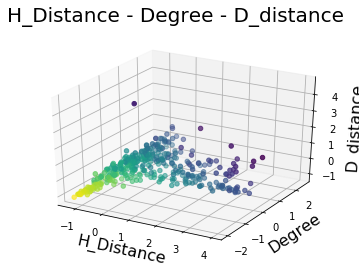

In [33]:
preds = model.predict(std_test_input)

fig = plt.figure()
fig.suptitle('H_Distance - Degree - D_distance', fontsize=20)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(std_test_input[:,1], std_test_input[:,0],
                                              std_test_input[:,2], c=preds)
ax.set_xlabel('H_Distance', fontsize=16)
ax.set_ylabel('Degree', fontsize=16)
ax.set_zlabel('D_distance', fontsize=16)

Saving model.

In [34]:
from keras.models import load_model

model.save('right_left.h5')